In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pickle
from sklearn.metrics import classification_report, confusion_matrix

Data Preparation

In [29]:
training_set =image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 76515 files belonging to 4 classes.


In [30]:
validation_set =image_dataset_from_directory(
    "val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 21861 files belonging to 4 classes.


In [15]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [16]:
input_shape = (224, 224, 3)

In [17]:
mobNetV =tf.keras.applications.MobileNetV3Large(
    input_shape=input_shape,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

22661472/22661472 [==============================] - 15s 1us/step


In [18]:
model = tf.keras.Sequential()

In [19]:
model.add(tf.keras.Input(shape=input_shape))

In [20]:
model.add(mobNetV)

In [21]:
model.add(tf.keras.layers.Dense(units=4, activation="softmax"))

In [25]:
metrics_list = [
    "accuracy", 
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=metrics_list
)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [31]:
training_history = model.fit(
    x = training_set,
    validation_data=validation_set,
    epochs=15,
)

Epoch 1/15
4783/4783 [==============================] - 482s 101ms/step - loss: 1.0194 - accuracy: 0.8372 - precision: 0.9550 - recall: 0.1211 - val_loss: 0.7870 - val_accuracy: 0.8995 - val_precision: 0.9442 - val_recall: 0.4683
Epoch 2/15
4783/4783 [==============================] - 489s 102ms/step - loss: 0.6482 - accuracy: 0.8936 - precision: 0.9198 - recall: 0.7896 - val_loss: 0.5185 - val_accuracy: 0.8876 - val_precision: 0.9650 - val_recall: 0.7896
Epoch 3/15
4783/4783 [==============================] - 493s 103ms/step - loss: 0.4335 - accuracy: 0.9177 - precision: 0.9640 - recall: 0.8528 - val_loss: 0.3801 - val_accuracy: 0.9267 - val_precision: 0.9756 - val_recall: 0.8423
Epoch 4/15
4783/4783 [==============================] - 492s 103ms/step - loss: 0.3023 - accuracy: 0.9543 - precision: 0.9696 - recall: 0.8866 - val_loss: 0.2568 - val_accuracy: 0.9563 - val_precision: 0.9688 - val_recall: 0.9462
Epoch 5/15
4783/4783 [==============================] - 493s 103ms/step - loss: 

In [32]:
model.save("./Trained_Model.h5")

In [33]:
training_history.history

{'loss': [1.019428014755249,
  0.6482160091400146,
  0.43353232741355896,
  0.3022870719432831,
  0.2172396183013916,
  0.16067421436309814,
  0.12280230969190598,
  0.09944693744182587,
  0.08387169241905212,
  0.0706123486161232,
  0.06055669113993645,
  0.052932292222976685,
  0.05108383670449257,
  0.04454481601715088,
  0.042467378079891205],
 'accuracy': [0.8371822237968445,
  0.8936156034469604,
  0.9177154898643494,
  0.9542834758758545,
  0.9627131819725037,
  0.970241129398346,
  0.9761745929718018,
  0.9802130460739136,
  0.9830490946769714,
  0.9856759905815125,
  0.9880415797233582,
  0.9894922375679016,
  0.9893093109130859,
  0.9910344481468201,
  0.9909560084342957],
 'precision': [0.9549763202667236,
  0.9198282957077026,
  0.9639702439308167,
  0.9695865511894226,
  0.9672167897224426,
  0.9730895757675171,
  0.9779115915298462,
  0.9812291860580444,
  0.9837278127670288,
  0.9863379597663879,
  0.9885788559913635,
  0.989967405796051,
  0.9897329211235046,
  0.991304

In [35]:
with open("Training_history.pkl", "wb") as f:
    pickle.dump(training_history.history, f)

In [37]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

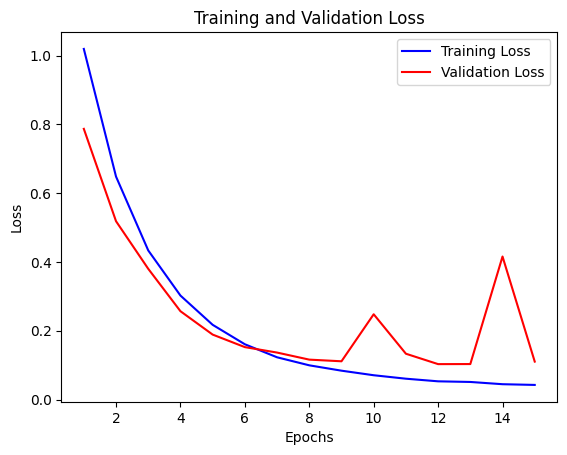

In [38]:
epochs = [i for i in range(1, 16)]
plt.plot(epochs, training_history.history['loss'], color='blue', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model Evaluation

In [46]:
testing_set = image_dataset_from_directory(
    "test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10933 files belonging to 4 classes.


In [47]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(testing_set)

684/684 [==============================] - 18s 26ms/step - loss: 0.1215 - accuracy: 0.9693 - precision: 0.9705 - recall: 0.9684


In [48]:
true_categories = tf.concat([y for x, y in testing_set], axis=0)
y_true = tf.argmax(true_categories, axis=1)

In [49]:
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [50]:
y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [51]:
predicted_categories = model.predict(testing_set)
predicted_categories

684/684 [==============================] - 17s 24ms/step


array([[9.9287111e-01, 2.0918392e-03, 3.9270194e-03, 1.1100275e-03],
       [9.9287027e-01, 2.0931019e-03, 3.9266134e-03, 1.1100251e-03],
       [9.9287111e-01, 2.0918392e-03, 3.9270194e-03, 1.1100275e-03],
       ...,
       [5.2991754e-04, 1.7031630e-03, 2.7751992e-03, 9.9499172e-01],
       [5.2991754e-04, 1.7031630e-03, 2.7751992e-03, 9.9499172e-01],
       [5.2991754e-04, 1.7031630e-03, 2.7751992e-03, 9.9499172e-01]],
      dtype=float32)

In [52]:
y_pred = tf.argmax(predicted_categories, axis=1)
y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

Classification Report

In [54]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3746
           1       0.98      0.91      0.95      1161
           2       0.87      0.90      0.88       887
           3       0.98      0.99      0.98      5139

    accuracy                           0.97     10933
   macro avg       0.95      0.94      0.95     10933
weighted avg       0.97      0.97      0.97     10933



Confusion Matrix

In [56]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[3657,   11,   65,   13],
       [  22, 1062,    6,   71],
       [  56,    3,  797,   31],
       [   3,    6,   49, 5081]], dtype=int64)

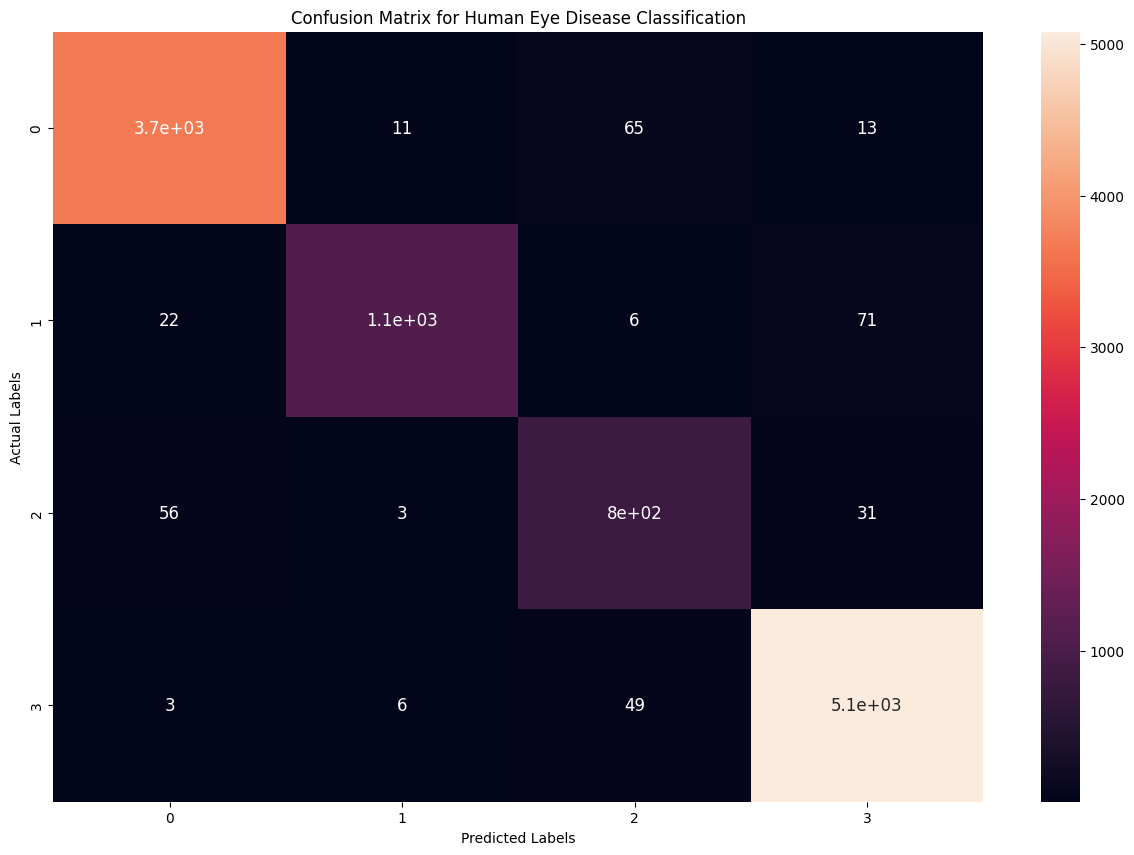

In [63]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Human Eye Disease Classification')
plt.show()